In [29]:
# unitvelo virtual environment

import scvelo as scv
import unitvelo as utv
import scanpy as sc
import tf_keras
import os
import datetime
import random
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
adata_split1 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry-subset_split1.h5ad")
adata_split1

AnnData object with n_obs × n_vars = 9862 × 545
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'datapath', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 

In [5]:
adata_split2 = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry-subset_split2.h5ad")
adata_split2

AnnData object with n_obs × n_vars = 9862 × 537
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'datapath', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 

In [6]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry-subset.h5ad")
adata

AnnData object with n_obs × n_vars = 9862 × 795
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'data_des', 'datapath', 'hvg', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'


In [7]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # used to be n_neighbors=10
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocity graph (using 1/20 cores)


  0%|          | 0/9862 [00:00<?, ?cells/s]

    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


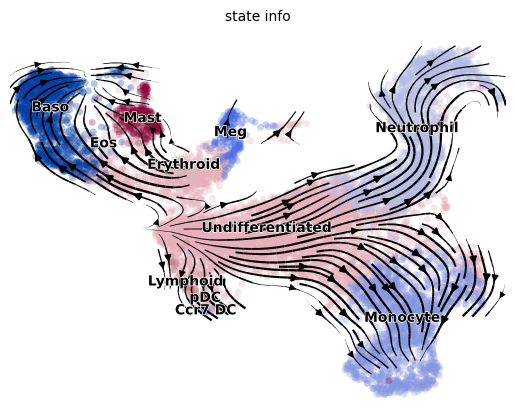

In [8]:
celltype_label = 'state_info'
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap',
                                 color=celltype_label,
                                 recompute=True)

In [9]:
import sys
sys.path.append('/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/veloUncertainty')
from v2_functions import *

In [21]:
method = 'utv'
text_x=None
text_y=None
cos_sim, Ngenes = compute_cosine_similarity(
    adata_split1,
    adata_split2,
    method
)
cos_sim

Number of overlapped genes for velocity computation in splits = 491


array([ 0.98459274,  0.97581255,  0.72105396, ..., -0.49075207,
        0.9800603 ,  0.8519792 ], dtype=float32)

Text(0.5, 1.0, 'Histogram of cosine similarity, Ngenes=491')

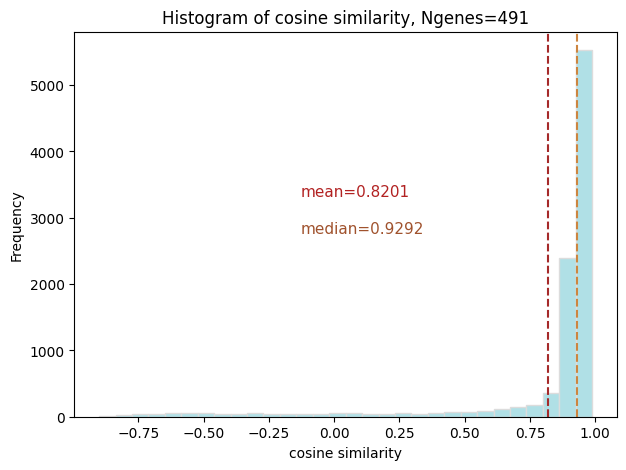

In [23]:
plt.figure(figsize=(7, 5))
counts, bins, patches = plt.hist(cos_sim, bins=30, edgecolor='gainsboro',color='powderblue') 
max_frequency = np.max(counts)
if text_x is None: text_x = np.quantile(cos_sim,[.05])[0]
if text_y is None: text_y = max_frequency/5
plt.axvline(np.mean(cos_sim), color='brown', linestyle='dashed', linewidth=1.5) ## add mean
plt.axvline(np.median(cos_sim), color='peru', linestyle='dashed', linewidth=1.5) ## add median
plt.text(text_x,text_y*3,'mean='+str(np.round(np.mean(cos_sim),4)), color='firebrick', fontsize=11)
plt.text(text_x,text_y*2.5,'median='+str(np.round(np.median(cos_sim),4)), color='sienna', fontsize=11)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Histogram of cosine similarity, Ngenes='+str(Ngenes))

In [24]:
adata.obs['cos_sim'] = cos_sim
adata

AnnData object with n_obs × n_vars = 9862 × 795
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes_by_counts', 'total_counts', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'cos_sim'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'data_des', 'datapath', 'hvg', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'veloci

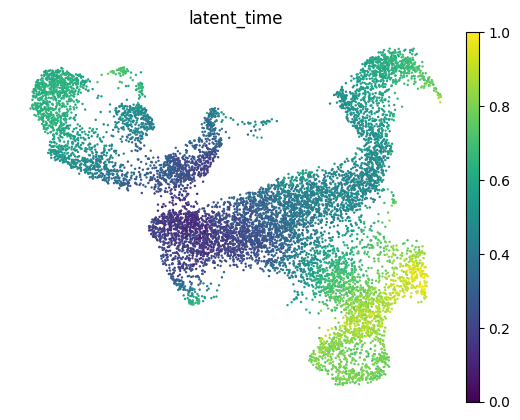

In [31]:
sc.pl.umap(
    adata,
    color="latent_time",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

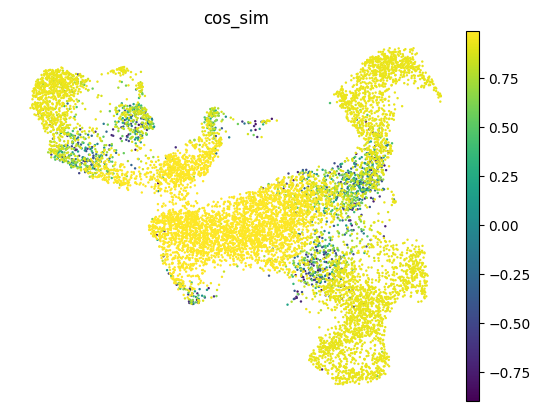

In [32]:
sc.pl.umap(
    adata,
    color="cos_sim",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

In [26]:
cos_sim = adata.obs['cos_sim']
latent_time = adata.obs['latent_time']
state_info = adata.obs['state_info']
state_colors = adata.uns['state_info_colors']

state_color_mapping = {state: state_colors[i] for i, state in enumerate(adata.obs['state_info'].unique())}
colors = adata.obs['state_info'].map(state_color_mapping)

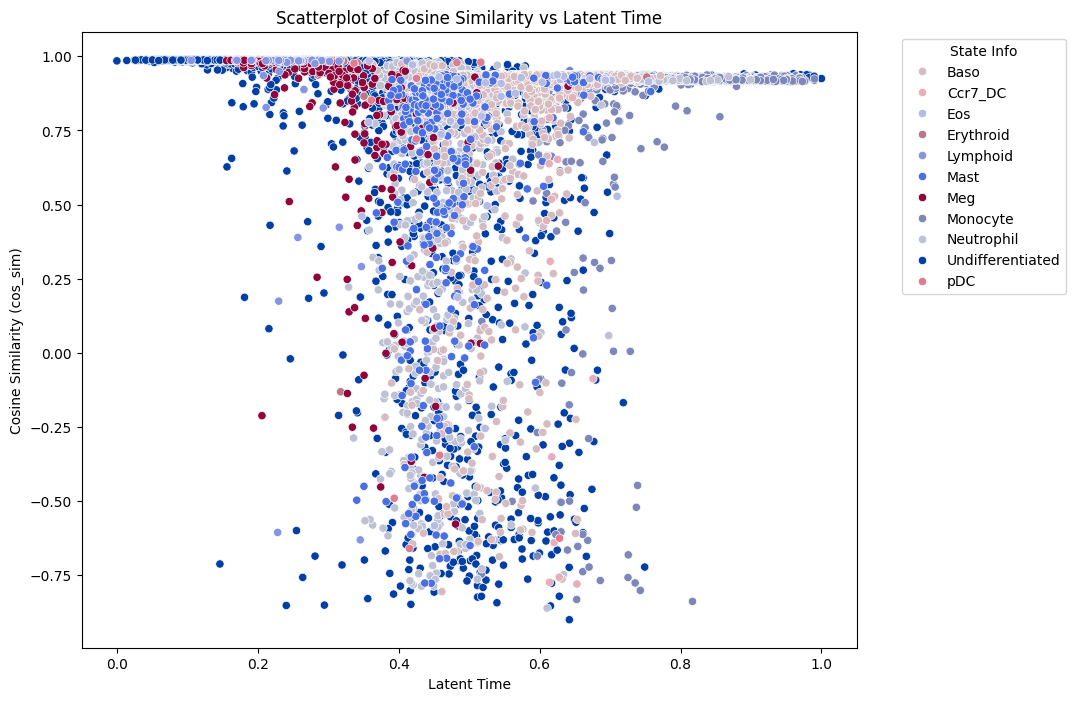

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_time, y=cos_sim, hue=state_info, palette=state_color_mapping)
plt.ylabel('Cosine Similarity (cos_sim)')
plt.xlabel('Latent Time')
plt.title('Scatterplot of Cosine Similarity vs Latent Time')
plt.legend(title='State Info', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
